In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping
import tf_keras
import seaborn as sns

In [2]:
import string
import re
import nltk

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv("/content/drive/MyDrive/words.csv")

In [5]:
df

,string,final
0,*screams in 25 different languages*,2
1,Families to sue over Legionnaires: More than 4...,0
2,Pandemonium In Aba As Woman Delivers Baby With...,0
3,My emotions are a train wreck. My body is a tr...,2
4,Alton brown just did a livestream and he burne...,2
...,...,...
1859,@Trollkrattos Juan Carlos Salvador The Secret ...,1
1860,@devon_breneman hopefully it doesn't electrocu...,2
1861,Businesses are deluged with invokces. Make you...,1
1862,#BREAKING411 4 police officers arrested for ab...,0


In [6]:
X = tf.convert_to_tensor(df["string"].astype(str).values, dtype=tf.string)
y = tf.convert_to_tensor(df["final"].astype(int).values, dtype=tf.int32)

dataset = tf.data.Dataset.from_tensor_slices((X, y))

total_size = len(df)
train_end = int(0.7 * total_size)
val_end = int(0.85 * total_size)

train_ds = dataset.take(train_end)
val_ds = dataset.skip(train_end).take(val_end - train_end)
test_ds = dataset.skip(val_end)


BATCH_SIZE = 32
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


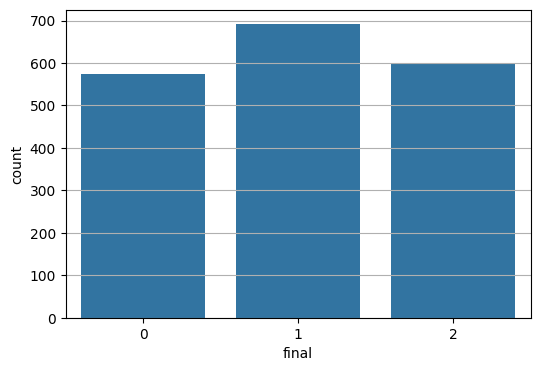

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["final"])
plt.xticks([0, 1, 2])
plt.grid(axis='y')
plt.show()

In [8]:
df.shape

(1864, 2)

In [9]:
embedding_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

In [10]:
hub_layer = hub.KerasLayer(embedding_model_url,input_shape=[],dtype=tf.string,trainable=False)

In [11]:
nlp_model = tf_keras.Sequential()

In [12]:
nlp_model = tf_keras.Sequential()
nlp_model.add(hub_layer)
nlp_model.add(tf_keras.layers.Dense(128,activation='relu'))
nlp_model.add(tf_keras.layers.Dropout(0.7))
nlp_model.add(tf_keras.layers.Dense(64,activation='relu'))
nlp_model.add(tf_keras.layers.Dropout(0.7))
nlp_model.add(tf_keras.layers.Dense(32,activation='relu'))
nlp_model.add(tf_keras.layers.Dropout(0.3))
nlp_model.add(tf_keras.layers.Dense(3,activation='softmax'))

In [13]:
tf.keras.layers.BatchNormalization()

<BatchNormalization name=batch_normalization, built=False>

In [14]:
nlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

In [15]:
nlp_model.compile(optimizer='Adam',loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy']) # Keep from_logits=False

In [16]:
history1 = nlp_model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=20,
    verbose=2
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/tf_keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


41/41 - 10s - loss: 1.0942 - accuracy: 0.3681 - val_loss: 1.0754 - val_accuracy: 0.4321 - 10s/epoch - 246ms/step
Epoch 2/20
41/41 - 0s - loss: 1.0783 - accuracy: 0.4026 - val_loss: 1.0422 - val_accuracy: 0.6071 - 460ms/epoch - 11ms/step
Epoch 3/20
41/41 - 0s - loss: 1.0207 - accuracy: 0.4770 - val_loss: 0.9280 - val_accuracy: 0.6571 - 482ms/epoch - 12ms/step
Epoch 4/20
41/41 - 0s - loss: 0.9522 - accuracy: 0.5353 - val_loss: 0.7950 - val_accuracy: 0.6857 - 461ms/epoch - 11ms/step
Epoch 5/20
41/41 - 0s - loss: 0.8255 - accuracy: 0.6173 - val_loss: 0.7097 - val_accuracy: 0.7107 - 465ms/epoch - 11ms/step
Epoch 6/20
41/41 - 0s - loss: 0.7686 - accuracy: 0.6434 - val_loss: 0.6607 - val_accuracy: 0.7536 - 463ms/epoch - 11ms/step
Epoch 7/20
41/41 - 0s - loss: 0.7374 - accuracy: 0.6526 - val_loss: 0.6445 - val_accuracy: 0.7393 - 461ms/epoch - 11ms/step
Epoch 8/20
41/41 - 1s - loss: 0.7194 - accuracy: 0.6917 - val_loss: 0.6485 - val_accuracy: 0.7321 - 520ms/epoch - 13ms/step
Epoch 9/20
41/41 - 

In [17]:
results1 = nlp_model.evaluate(test_ds, verbose=2)

9/9 - 0s - loss: 0.6596 - accuracy: 0.7714 - 85ms/epoch - 9ms/step
